# From FASTAQ files to normalized interaction matrices (Caulobacter crescentus)


In [1]:
! ls /home/nikita/Downloads/

ge.py~


In [7]:
from matplotlib import pyplot as plt

In [8]:
from pytadbit.utils.fastq_utils import quality_plot

In [11]:
FASTQs = '/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs'

In [10]:
ls /home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq

/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq


BglII 1


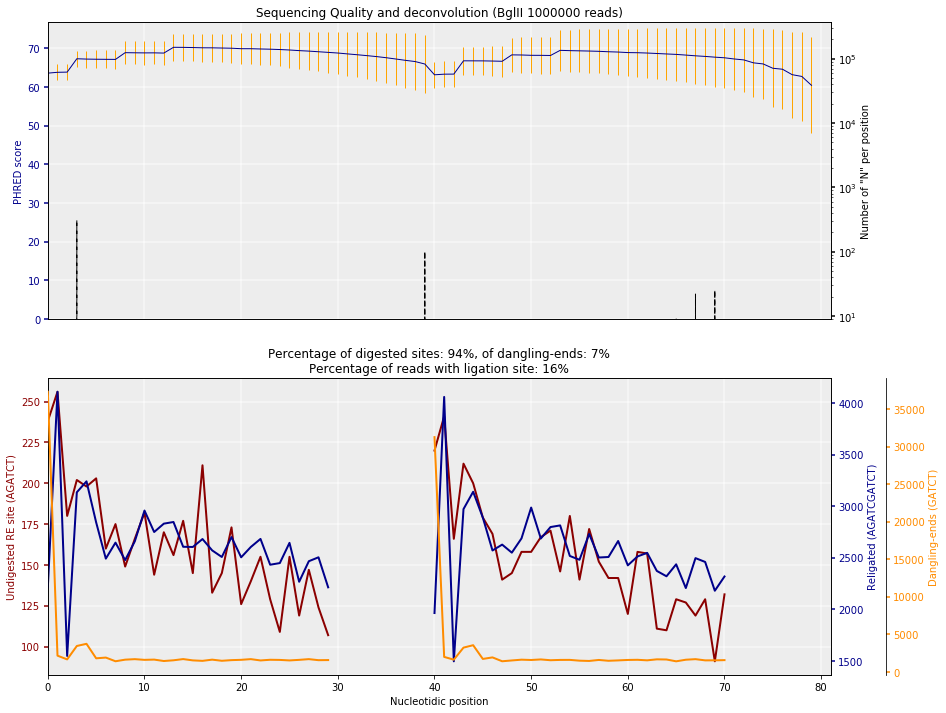


BglII 2


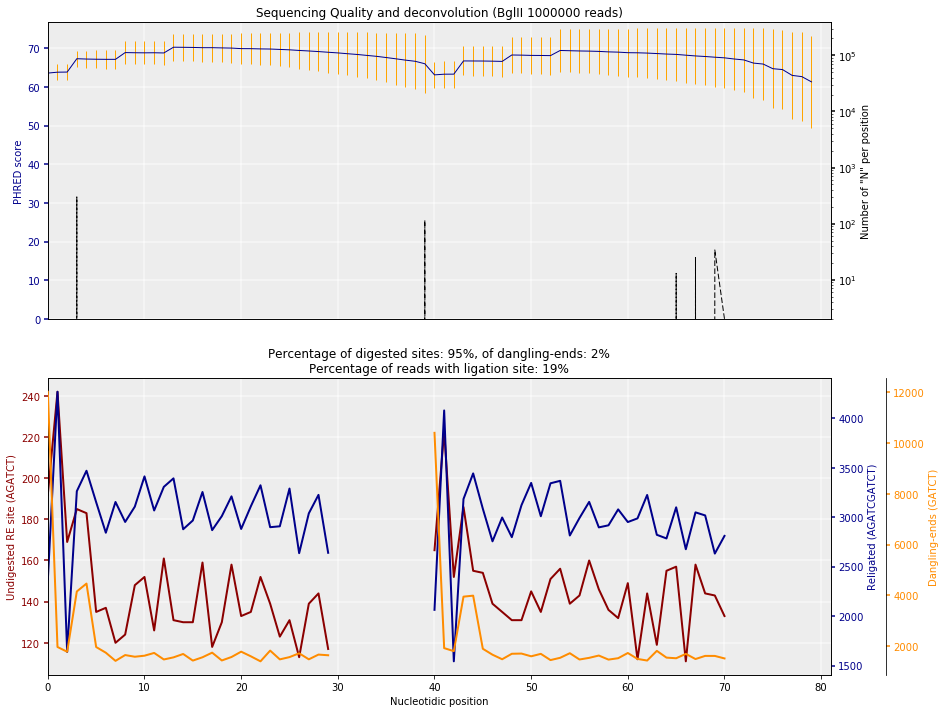

In [9]:
for r_enz in ['BglII']:
    for rep in ['1', '2']:
        print r_enz, rep
        quality_plot(FASTQs + "/Laublab" + r_enz + "_HiC_NA1000_swarmer_cell_untreated_replicate" + rep + ".fastq", 
                    r_enz=r_enz, nreads=1000000, paired=True)
        print ''

In [2]:
from pytadbit.mapping.full_mapper import full_mapping
import pytadbit


IMP not found, check PYTHONPATH
/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/__init__.py:126: UserWarning: IMP not found, check PYTHONPATH

  warn('IMP not found, check PYTHONPATH\n')


In [21]:
r_enz = 'BglII'
rep = '1'

In [ ]:
print 'Mapping the first end of the read\n'
mapped_r1 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_NA1000.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01_mapping/Caulobacter_BglII_replicate1_mapped_r1',
                         windows=(1, 40),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=True, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp')


In [1]:
print 'n\nMapping the second end of the read\n'
mapped_r2 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_NA1000.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01_mapping/Caulobacter_BglII_replicate1_mapped_r2',
                         windows=(41, 80),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=False, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp')


n
Mapping the second end of the read



NameError: name 'full_mapping' is not defined

In [6]:
from pytadbit.parsers.genome_parser import parse_fasta
from matplotlib import pyplot as plt
import numpy as np

In [7]:
genome_seq = parse_fasta('/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_NA1000.fa')

Parsing chr1


In [8]:
from pytadbit.mapping.restriction_enzymes import map_re_sites

frags_BglII = map_re_sites('BglII', genome_seq, verbose=True)


Found 700 RE sites


In [13]:
c0 = frags_BglII.keys()[0]
v0 = 0
dists_BglII = []
for c1, v1 in [(c, v) for c in frags_BglII for p in frags_BglII[c] 
               for v in frags_BglII[c][p]]:
    if c1 == c0:
        diff = abs(v1 - v0)
        if diff < 30000:
            dists_BglII.append(diff)
    v0 = v1
    
plt.figure(figsize=(12, 6))
_ = plt.hist([dists_BglII], bins=50, color=['red'], 
             alpha=0.5, label=['BglII'])
y0, y1 = plt.ylim()
plt.vlines(np.median(dists_BglII), y0, y1 * 0.7, color='red', linestyle='--',
          label='median BglII')
plt.text(np.median(dists_BglII), y1 * 0.7, '%.0f' % np.median(dists_BglII), va='bottom', 
         ha='left')
plt.title('Restriction fragment size distribution')
plt.legend()
plt.grid()

In [17]:
plt.show()


Plotting


In [15]:
maps1 = ['/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01mapping/Caulobacter_BglII_replicate1_mapped_r1/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map', '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01mapping/Caulobacter_BglII_replicate1_mapped_r1/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map']

maps2 = ['/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01mapping/Caulobacter_BglII_replicate1_mapped_r2/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map', '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/01mapping/Caulobacter_BglII_replicate1_mapped_r2/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_41-80.map']


In [ ]:
reads1 = '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/02parsing/reads1.tsv'
reads2 = '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/02parsing/reads2.tsv'

In [ ]:
from pytadbit.parsers.map_parser import parse_map
print 'Parse MAP files....'
parse_map(maps1, maps2, out_file1=reads1, out_file2=reads2, genome_seq=genome_seq, 
          re_name='BglII', 
          verbose=True)

In [35]:
from pytadbit.mapping import get_intersection

In [21]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/03filtering/reads12.tsv'

In [37]:
get_intersection(reads1, reads2, reads, verbose=True) 




Getting intersection of reads 1 and reads 2:
 
  .......... .......
Found 14689738 pair of reads mapping uniquely
Sorting each temporary file by genomic coordinate
    1025/1025 sorted files
Removing temporary files...


(14689738, {2: 375387, 3: 4})

In [19]:
from pytadbit.mapping.analyze import plot_distance_vs_interactions
plot_distance_vs_interactions(reads, resolution=100000, max_diff=40, show=True)


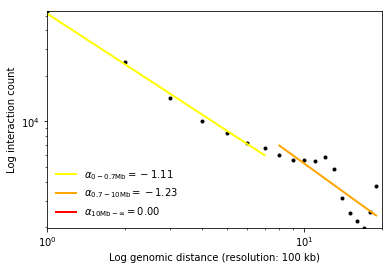

((-1.1085160612001339, 10.853291812228891, -0.99573662980092403),
 (-1.2295929848042861, 11.399988655126513, -0.80755082747724194),
 (0, 0, 0))

In [35]:
plot_distance_vs_interactions(reads, resolution=100000, max_diff=40, show=True)

In [133]:
from pytadbit.mapping.analyze import plot_genomic_distribution
plot_genomic_distribution(reads, resolution=50000,  show=True)

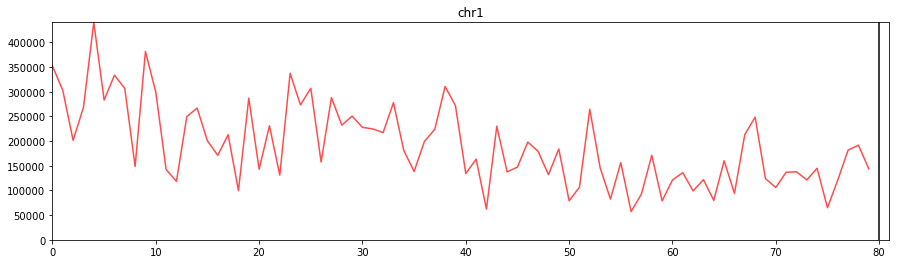

In [134]:
plot_genomic_distribution(reads, resolution=50000,  show=True)

In [129]:
from pytadbit.mapping.analyze import hic_map

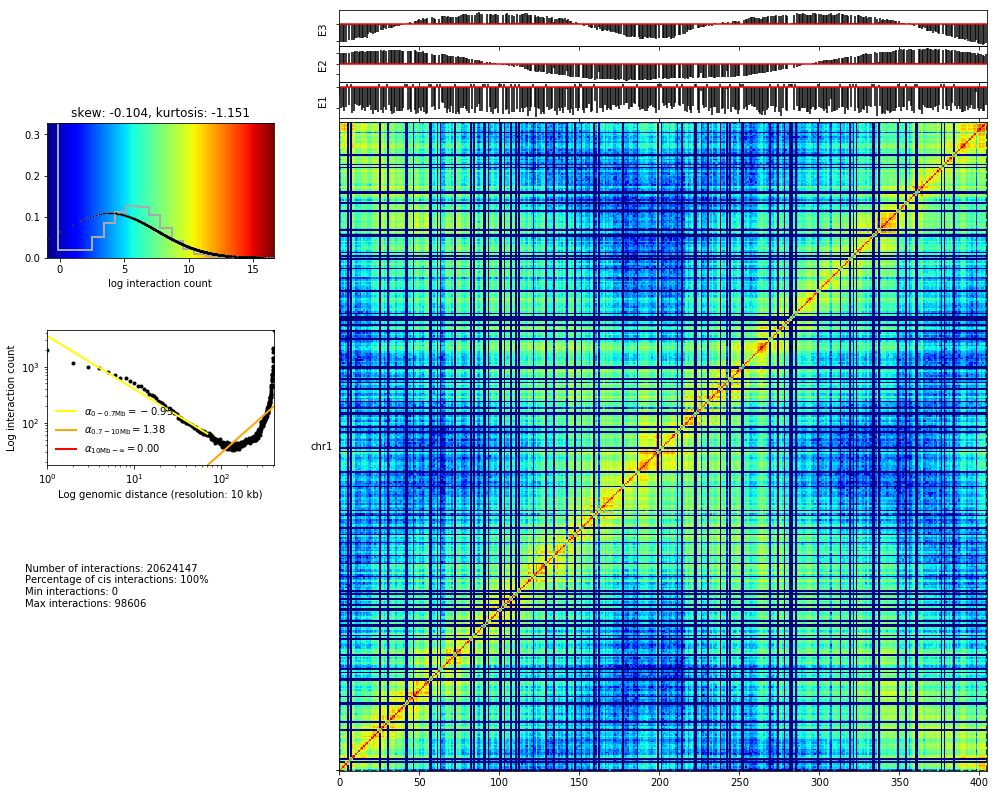

In [131]:
hic_map(reads, resolution=10000, show=True)

In [42]:
from pytadbit.mapping.analyze import insert_sizes

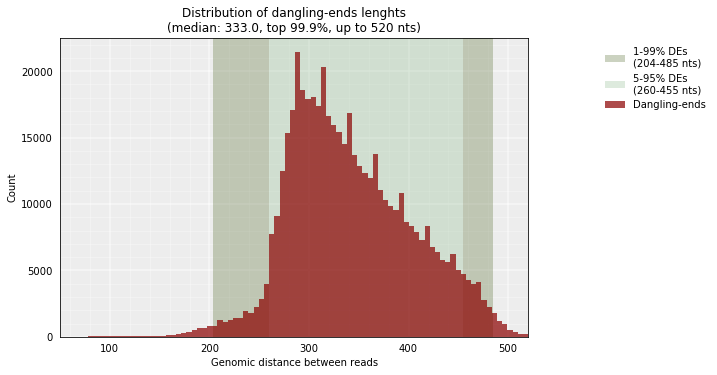

[333.0, 520.0]

In [43]:
insert_sizes(reads, show=True, nreads=1000000)

In [135]:
#Filtering 
from pytadbit.mapping.filter import filter_reads

In [136]:
masked = filter_reads(reads,max_molecule_length=750, over_represented=0.005, max_frag_size=100000, 
    min_frag_size=100, re_proximity=5, min_dist_to_re=1000)

Filtered reads (and percentage of total):

     Mapped both                :     15440531 (100.00%)
  -----------------------------------------------------
   1- self-circle               :       121774 (  0.79%)
   2- dangling-end              :      2029973 ( 13.15%)
   3- error                     :         4370 (  0.03%)
   4- extra dangling-end        :      2819525 ( 18.26%)
   5- too close from RES        :      2059410 ( 13.34%)
   6- too short                 :       133227 (  0.86%)
   7- too large                 :            0 (  0.00%)
   8- over-represented          :       300439 (  1.95%)
   9- duplicated                :      6353450 ( 41.15%)
  10- random breaks             :      1283705 (  8.31%)


In [137]:
from pytadbit.mapping.filter import apply_filter

In [138]:
apply_filter(reads,
             '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/03filtering/valid_reads12.tsv', masked, 
             filters=[1, 2, 3, 4, 9, 10])

    saving to file 6705504 reads without .


6705504

In [140]:
valid_reads= '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/03filtering/valid_reads12.tsv'

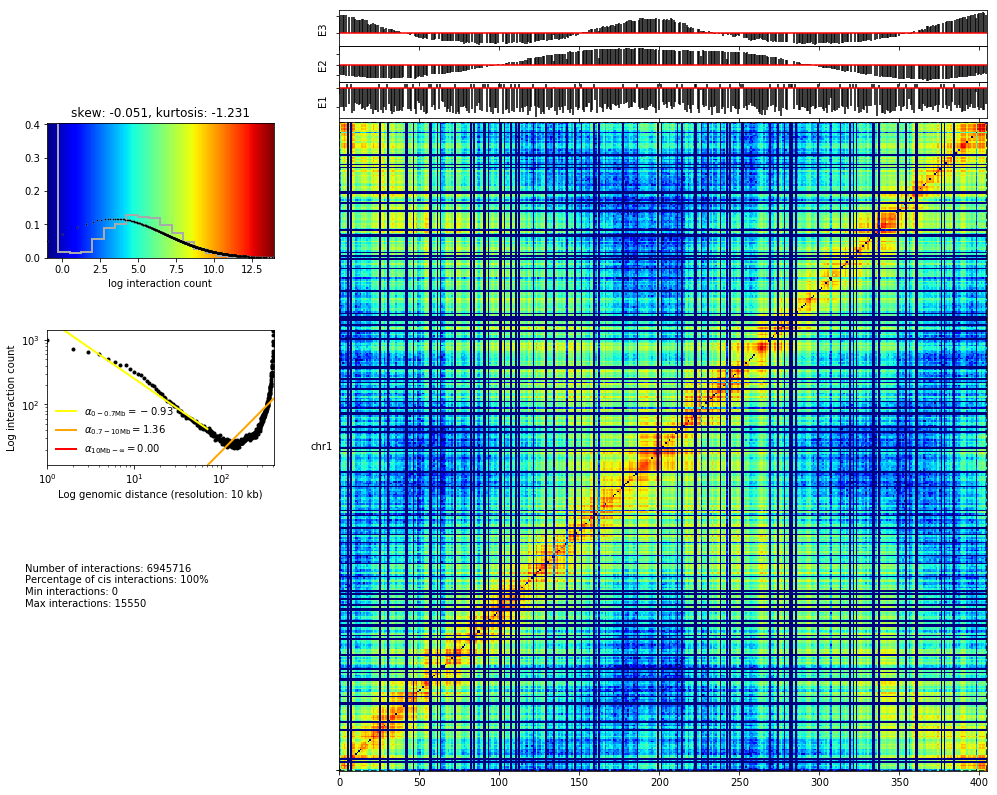

In [141]:
hic_map(valid_reads, resolution=10000, show=True)

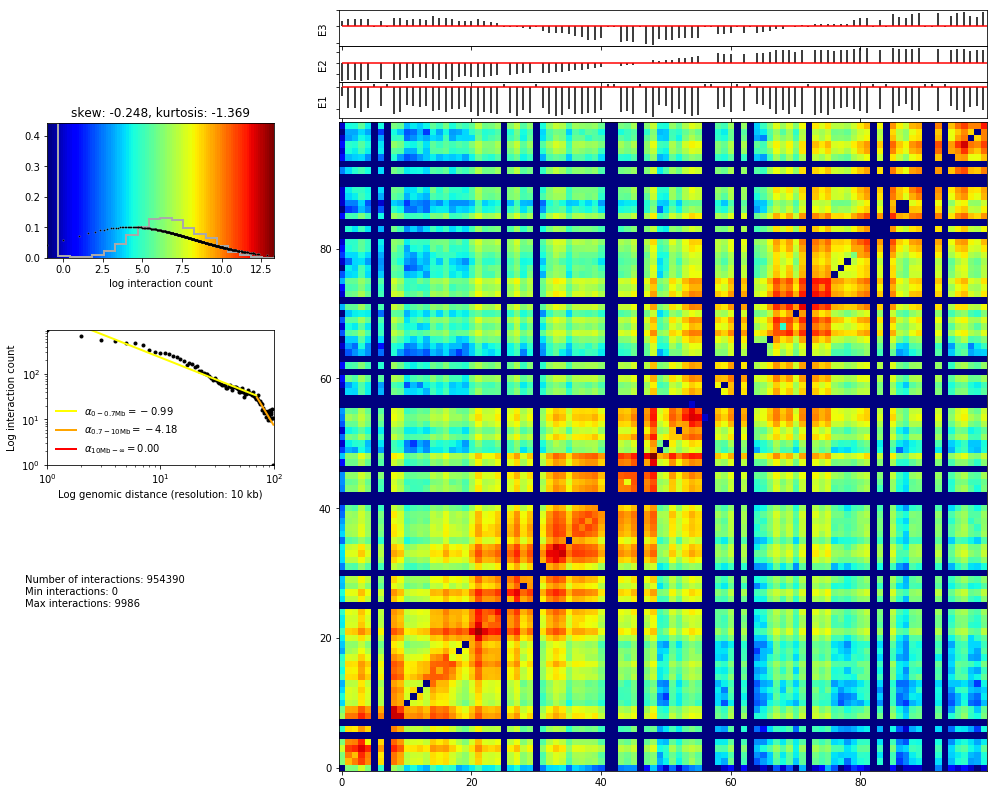

In [144]:
hic_map(valid_reads, 
        resolution=10000, show=True, focus=(1,100))

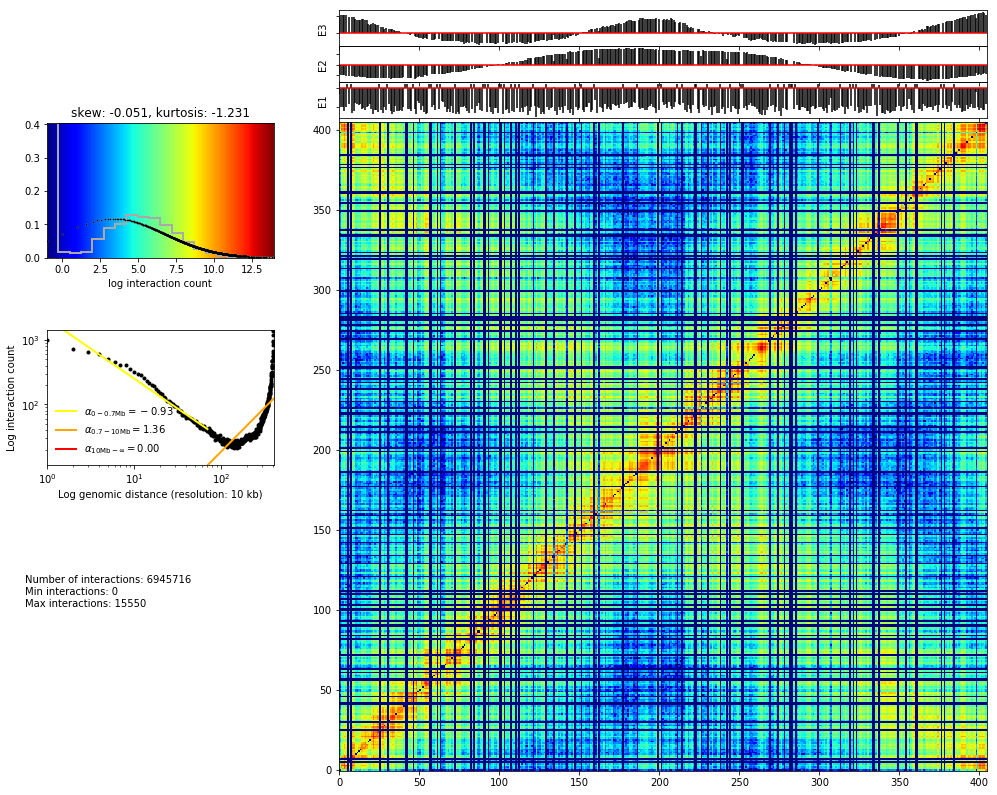

In [146]:
hic_map(valid_reads, 
        resolution=10000, show=True, focus=(1, 405))


In [149]:
#Ben-filtering
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [150]:
reso = 10000

In [151]:
hic_data = load_hic_data_from_reads(
    valid_reads,  reso)


     6     8    26    31    42    43    47    57    58    62    64    73    83    85    91    92    94   101   102   104
   108   111   113   122   130   148   152   160   178   187   200   202   212   215   223   224   231   239   245   252
   253   270   275   279   282   283   284   286   300   314   320   322   324   334   335   350   355   361   362   377
   379   385
/home/nikita/miniconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


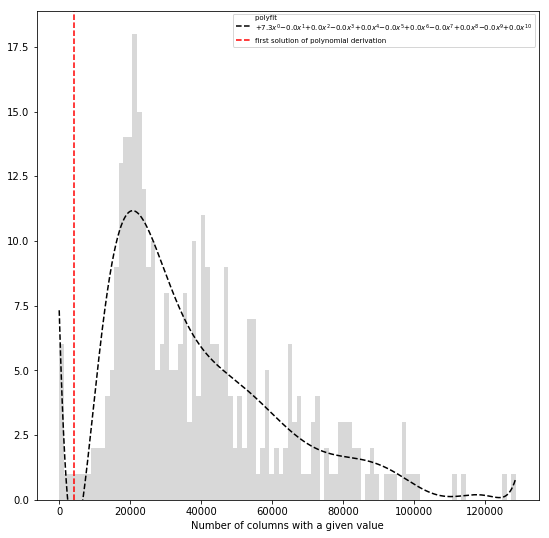

Found 70 of 405 columns with poor signal


/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/utils/hic_filtering.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  round(root, 3), ' '.join(

     6     8    26    31    42    43    47    57    58    62    64    73    83    85    91    92    94   101   102   104
   108   111   113   122   130   135   143   148   152   160   163   178   187   200   202   212   215   223   224   227
   231   239   243   245   252   253   270   275   279   282   283   284   286   300   308   314   320   322   324   334
   335   338   350   355   361   362   377   379   385   399


In [152]:
hic_data.filter_columns(draw_hist=True, min_count=10, by_mean=True)

In [153]:
print len(hic_data)
print len(hic_data.bads)

405
70


In [154]:
hic_data.normalize_hic(iterations=10, max_dev=0.1)

iterative correction
  - copying matrix
  - computing baises
          5107.000       39978.896      128630.000    0   2.21745
         32807.969       40398.017       47632.143    1   0.18788
         37955.831       40464.605       43918.242    2   0.08535
rescaling to factor 1
  - getting the sum of the matrix
    => 335.162
  - rescaling biases


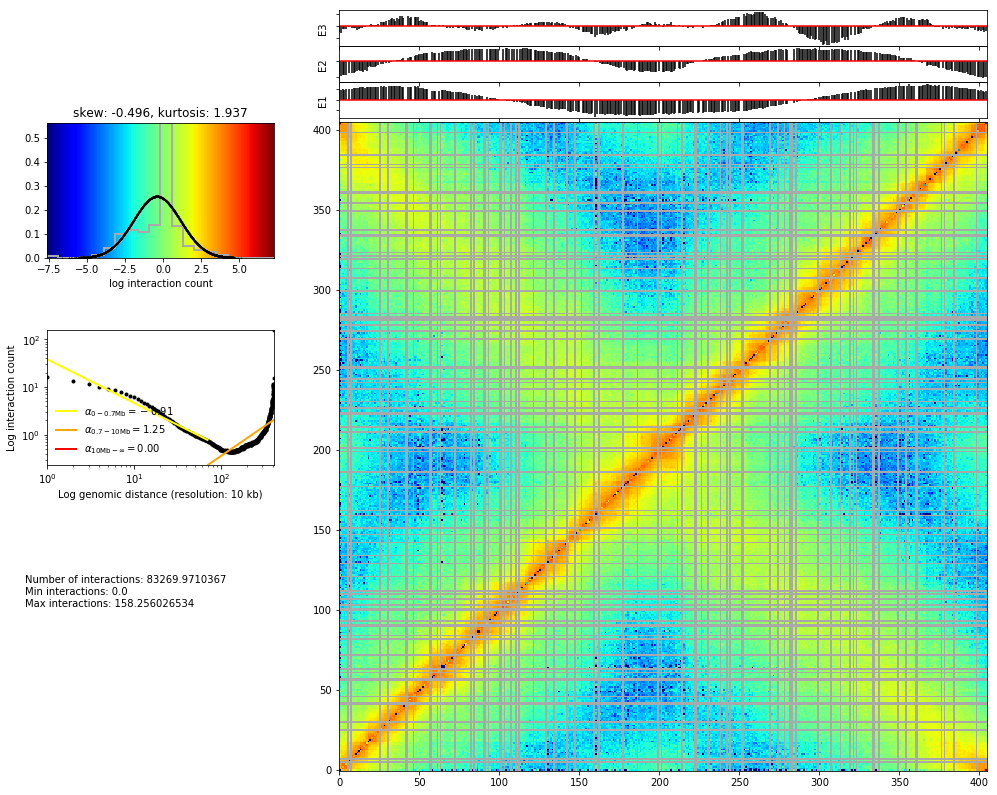

In [156]:
hic_map(hic_data, normalized=True, focus=(1,405), show=True)

In [157]:
from cPickle import dump

In [158]:
out = open('/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/04normalizing/biases.pick', 'w')
dump(hic_data.bias, out)
out.close()


In [159]:
out = open('/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/04normalizing/bad_columns.pick', 'w')
dump(hic_data.bads, out)
out.close()

In [160]:
hic_map(hic_data, by_chrom='intra', normalized=False,
       savedata='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/04normalizing/10000reso_raw')

In [161]:
hic_map(hic_data, by_chrom='intra', normalized=True,
       savedata='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/04normalizing/10000reso_norm')

In [162]:
#05_compartments
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
from cPickle import load

In [163]:
reso = 10000
base_path = '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/03filtering/valid_reads12.tsv'
bias_path = '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/04normalizing/biases.pick'
bads_path = '/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/04normalizing/bad_columns.pick'

In [164]:
def my_load_hic_data(rep, reso):
    hic_data = load_hic_data_from_reads(base_path, resolution=reso)
    hic_data.bias = load(open(bias_path))
    hic_data.bads = load(open(bads_path))
    return hic_data


In [165]:
hic_data = my_load_hic_data(rep, reso)

In [166]:
crm = '2'
corr = hic_data.find_compartments(
        show=True, crms=[crm], vmin=-0.2, vmax=0.2,
        savedata='/home/nikita/Projects/Chromosomal_aberrations/results/Caulobacter_BglII_replicate1/05segmenting/compartments.tsv')

ZeroDivisionError: float division by zero

In [168]:
fh = open(valid_reads)

In [169]:
count = 0
for l in fh:
    count += 1
    print l.strip()
    if count > 100:
        break

# CRM chr1	4042929
SRR824843.8338706	chr1	100	0	40	1	15389	chr1	15455	0	40	15389	19394
SRR824843.15318794	chr1	100	0	40	1	15389	chr1	171654	1	40	169656	171721
SRR824843.11299089#2/3	chr1	100	0	40	1	15389	chr1	28532	0	21	28513	32206
SRR824843.10694350	chr1	100	0	40	1	15389	chr1	286947	0	40	286833	291587
SRR824843.11060915	chr1	100	0	40	1	15389	chr1	33278	1	40	32206	33384
SRR824843.10385482	chr1	100	0	40	1	15389	chr1	3407508	1	40	3402832	3407563
SRR824843.12041103	chr1	100	0	40	1	15389	chr1	35990	1	40	33384	36085
SRR824843.16104837	chr1	100	0	40	1	15389	chr1	36308	0	40	36085	40825
SRR824843.5614174	chr1	100	0	40	1	15389	chr1	3642652	1	40	3636700	3642765
SRR824843.100010#2/3	chr1	100	0	40	1	15389	chr1	3642747	1	23	3636700	3642765
SRR824843.11788564	chr1	100	0	40	1	15389	chr1	370557	1	27	365145	370579
SRR824843.12484440	chr1	100	0	40	1	15389	chr1	3831546	1	40	3823432	3831597
SRR824843.11711671	chr1	100	0	40	1	15389	chr1	3862272	1	36	3861235	3862303
SRR824843.15388200	chr1	100	0	40	1	15389	

In [170]:
genome_seq = parse_fasta('/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_NA1000.fa')

Parsing chr1


In [171]:
from pytadbit.mapping.restriction_enzymes import map_re_sites_nochunk

In [172]:
re_sites = map_re_sites_nochunk('bglii', genome_seq)

In [173]:
re_sites

{'chr1': [1,
  15389,
  19394,
  23999,
  28513,
  32206,
  33384,
  36085,
  40825,
  41068,
  63316,
  82739,
  85918,
  88641,
  90060,
  93183,
  93945,
  105625,
  117169,
  123838,
  139779,
  140679,
  142847,
  154950,
  158818,
  168136,
  169656,
  171721,
  171897,
  184377,
  198914,
  205819,
  208046,
  210502,
  213214,
  213231,
  214240,
  219551,
  220667,
  225783,
  233312,
  236479,
  239185,
  246946,
  247534,
  248795,
  262841,
  268681,
  271226,
  273895,
  276645,
  286833,
  291587,
  297468,
  316307,
  326023,
  327309,
  328239,
  332945,
  335534,
  339485,
  340757,
  341777,
  343968,
  356376,
  363850,
  364994,
  365145,
  370579,
  378715,
  379927,
  380776,
  389216,
  392301,
  395442,
  408070,
  435254,
  435642,
  444344,
  449925,
  450948,
  453597,
  471994,
  476748,
  481065,
  483851,
  484136,
  487906,
  491746,
  495083,
  509101,
  513365,
  518136,
  525770,
  533059,
  539331,
  541047,
  543480,
  545150,
  548778,
  551217,
  5